<a href="https://colab.research.google.com/github/matthewjcochran/stock_utils/blob/main/stock_examples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://raw.githubusercontent.com/matthewjcochran/stock_utils/main/stock_utils.py

--2026-01-19 20:33:00--  https://raw.githubusercontent.com/matthewjcochran/stock_utils/main/stock_utils.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2886 (2.8K) [text/plain]
Saving to: ‘stock_utils.py.2’

stock_utils.py.2    100%[===================>]   2.82K  --.-KB/s    in 0s      

2026-01-19 20:33:01 (33.0 MB/s) - ‘stock_utils.py.2’ saved [2886/2886]



In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

from stock_utils import get_sp500_tickers, build_company_info

In [3]:
tickers = get_sp500_tickers()
display(len(tickers))

503

In [4]:
info = build_company_info(tickers)
info = pd.DataFrame.from_dict(info, orient="index")
display(info)

,Name,Sector,Industry
A,"Agilent Technologies, Inc.",Healthcare,Diagnostics & Research
AAPL,Apple Inc.,Technology,Consumer Electronics
ABBV,AbbVie Inc.,Healthcare,Drug Manufacturers - General
ABNB,"Airbnb, Inc.",Consumer Cyclical,Travel Services
ABT,Abbott Laboratories,Healthcare,Medical Devices
...,...,...,...
XYZ,"Block, Inc.",Technology,Software - Infrastructure
YUM,"Yum! Brands, Inc.",Consumer Cyclical,Restaurants
ZBH,"Zimmer Biomet Holdings, Inc.",Healthcare,Medical Devices
ZBRA,Zebra Technologies Corporation,Technology,Communication Equipment


In [5]:
download = yf.download(tickers, start="2020-01-01", end="2026-01-19")

/tmp/ipython-input-2231922664.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  download = yf.download(tickers, start="2020-01-01", end="2026-01-19")
[*********************100%***********************]  503 of 503 completed


In [6]:
close = download["Close"]
# display(close)

In [7]:
annual = (close/close.shift(252) - 1)*100
annual = annual.tail(252).dropna(axis=1, how='any')
# display(annual)

In [8]:
quantile = annual.quantile(0.75)
top = quantile.sort_values(ascending=False).head(25).index.to_list()
info.loc(axis=0)[top]

,Name,Sector,Industry
PLTR,Palantir Technologies Inc.,Technology,Software - Infrastructure
APP,Applovin Corporation,Communication Services,Advertising Agencies
HOOD,"Robinhood Markets, Inc.",Financial Services,Capital Markets
CVNA,Carvana Co.,Consumer Cyclical,Auto & Truck Dealerships
WDC,Western Digital Corporation,Technology,Computer Hardware
TPR,"Tapestry, Inc.",Consumer Cyclical,Luxury Goods
AXON,"Axon Enterprise, Inc.",Industrials,Aerospace & Defense
VST,Vistra Corp.,Utilities,Utilities - Independent Power Producers
WBD,"Warner Bros. Discovery, Inc. -",Communication Services,Entertainment
TPL,Texas Pacific Land Corporation,Energy,Oil & Gas E&P


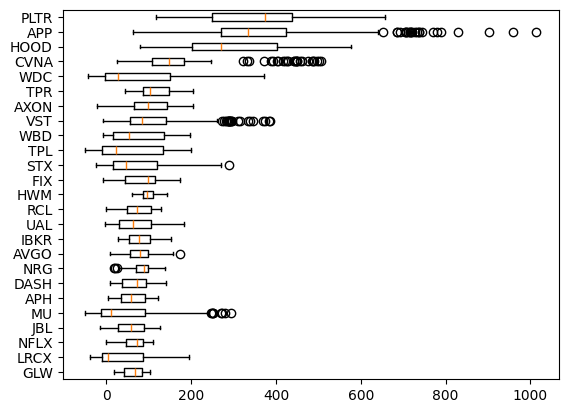

In [9]:
top.reverse()

plt.boxplot(
    annual[top],
    tick_labels=top,
    vert=False)
plt.show()